<a href="https://colab.research.google.com/github/mr-atinyo/ARTIFICIAL-INTELIIGENCE/blob/master/white_wine_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CSCD 312_AI EXAM SOLUTIONS TO QUESTIONS 1a and 2  | 10689990**

# **1a. White-wine Quality Analysis** 
The focus is to develop models that can predict wine quality - white-wine - based on physiochemical tests: alcohol quantity, fixed acidity, volatile acidity, etc., compare the performance of the models and discuss the result

#**Setup**
Let's begin by preparing the drive containing the dataset, since google colab notebook was used with the data set resident on google drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Importing all libraries needed for data exploration, preprocessing, developing and comparing the models

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
from scipy import stats
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

Loading the white-wine dataset

In [26]:
white_wine = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AI-EXAM/winequality-white.csv', delimiter = ';')
white_wine.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


In [27]:
white_wine.tail(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4897,6.0,0.21,0.38,0.8,0.02,22.0,98.0,0.98941,3.26,0.32,11.8,6


# **Exploratory Data Analysis**
The activities to be udertaken at this stage is as follows:

* Get dataFrame information

* Check for missing values

* Detect and eliminate outliers

* Look out for the relationship amongst variables in the dataset

###### The dataframe is as required by the question and there are no missing values
---



In [28]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [29]:
print(white_wine.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


We may want to look at some basic statistical details with respect to individual attributes in the dataFrame

In [30]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Let's use the boxplot to display the distribution of values in particular attributes - residual sugar,  free sulfur dioxide and total sulfur dioxide - so as to appreciate the existence of outliers and skewness

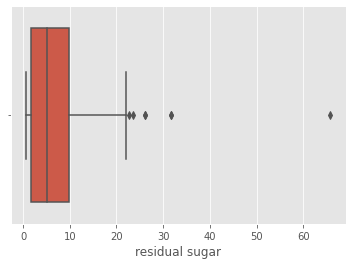

In [31]:
sns.boxplot(white_wine['residual sugar'])

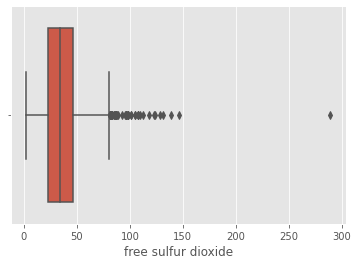

In [32]:
sns.boxplot(white_wine['free sulfur dioxide'])

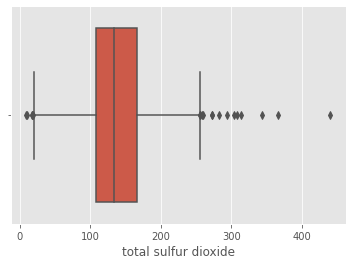

In [33]:
sns.boxplot(white_wine['total sulfur dioxide'])

Since the are a few outliers, let's go head and remove them using the z score method

In [34]:
white_wine.shape

(4898, 12)

In [35]:
z = np.abs(stats.zscore(white_wine))
white_wine = white_wine[(z < 3).all(axis=1)]
white_wine.shape

(4487, 12)

After dealing with outliers, let's take note of the relationship amongst the attributes of the white_wine dataset to identify the variables that strongly infuence wine quality

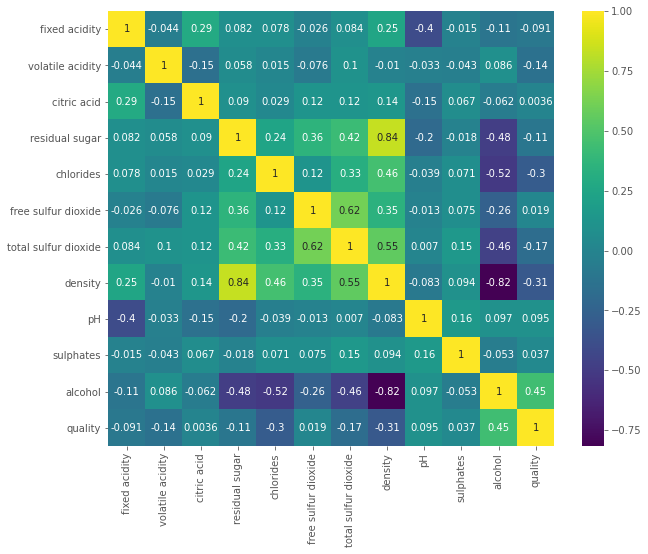

In [36]:
plt.subplots(figsize=(10, 8))
sns.heatmap(white_wine.corr(), annot = True, cmap = 'viridis')

# **Transformations applied to the data**
* Defining feature and target variables
* Standardizing the dataset
* Splitting dataset into train and test


In [0]:
X = np.asarray(white_wine.iloc[:,:-1])

y = np.asarray(white_wine['quality'])

In [0]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

seed = 20
kfold = model_selection.KFold(n_splits=10, random_state=seed)    

Train set: (3365, 11) (3365,)
Test set: (1122, 11) (1122,)


# **The Models**
* Logistic Regression
* Decision Tree
* K-Nearest Neighbors
* Random Forest
* GaussianNB

In [40]:
# Model 1 - Logistic regression model
logistic_reg = LogisticRegression(multi_class='multinomial',solver ='newton-cg')
logistic_reg.fit(X_train, y_train)

y_pred = logistic_reg.predict(X_test)

print(metrics.classification_report(y_test, y_pred, digits=3, zero_division = 1))

              precision    recall  f1-score   support

           4      1.000     0.000     0.000        31
           5      0.628     0.534     0.577       354
           6      0.528     0.779     0.629       502
           7      0.637     0.256     0.366       199
           8      1.000     0.000     0.000        36

    accuracy                          0.562      1122
   macro avg      0.759     0.314     0.314      1122
weighted avg      0.607     0.562     0.528      1122



In [41]:
# Model 2 - Decision Tree Classification model
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

print(metrics.classification_report(y_test, y_pred.round(), digits=3, zero_division=1))

              precision    recall  f1-score   support

           4      0.128     0.194     0.154        31
           5      0.633     0.638     0.636       354
           6      0.656     0.635     0.646       502
           7      0.545     0.518     0.531       199
           8      0.372     0.444     0.405        36

    accuracy                          0.597      1122
   macro avg      0.467     0.486     0.474      1122
weighted avg      0.606     0.597     0.601      1122



In [42]:
# Model 3 - K-Nearest Neighbors Classifier

knc = KNeighborsClassifier(n_neighbors=19)
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)

print(metrics.classification_report(y_test, y_pred, digits=3, zero_division = 1))

              precision    recall  f1-score   support

           4      0.000     0.000     0.000        31
           5      0.599     0.556     0.577       354
           6      0.556     0.705     0.622       502
           7      0.536     0.407     0.463       199
           8      0.250     0.028     0.050        36

    accuracy                          0.564      1122
   macro avg      0.388     0.339     0.342      1122
weighted avg      0.541     0.564     0.544      1122



In [43]:
# Model 4 - Random Forest Classification model
random_forest = RandomForestClassifier(n_estimators=100,random_state = 0)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print(metrics.classification_report(y_test, y_pred.round(), digits=3))

              precision    recall  f1-score   support

           4      0.600     0.194     0.293        31
           5      0.724     0.681     0.702       354
           6      0.654     0.803     0.721       502
           7      0.782     0.558     0.651       199
           8      0.762     0.444     0.561        36

    accuracy                          0.693      1122
   macro avg      0.704     0.536     0.586      1122
weighted avg      0.701     0.693     0.685      1122



In [44]:
# Model 5 - GaussianNB

gauss = GaussianNB()
gauss.fit(X_train, y_train)

y_pred = gauss.predict(X_test)
print(metrics.classification_report(y_test, y_pred.round(), digits=3))

              precision    recall  f1-score   support

           4      0.107     0.097     0.102        31
           5      0.512     0.585     0.546       354
           6      0.519     0.414     0.461       502
           7      0.384     0.548     0.451       199
           8      0.400     0.056     0.098        36

    accuracy                          0.471      1122
   macro avg      0.384     0.340     0.331      1122
weighted avg      0.478     0.471     0.464      1122



# **Discussing and Comparing Performance**


MEAN & STANDARD DEVIATION ACCURACY FOR EACH ALGORITHM
LR: 0.526303 (0.018542)
DCT: 0.589309 (0.036446)
KNN: 0.543265 (0.021818)
RDF: 0.672212 (0.030053)
NB: 0.466569 (0.033739)


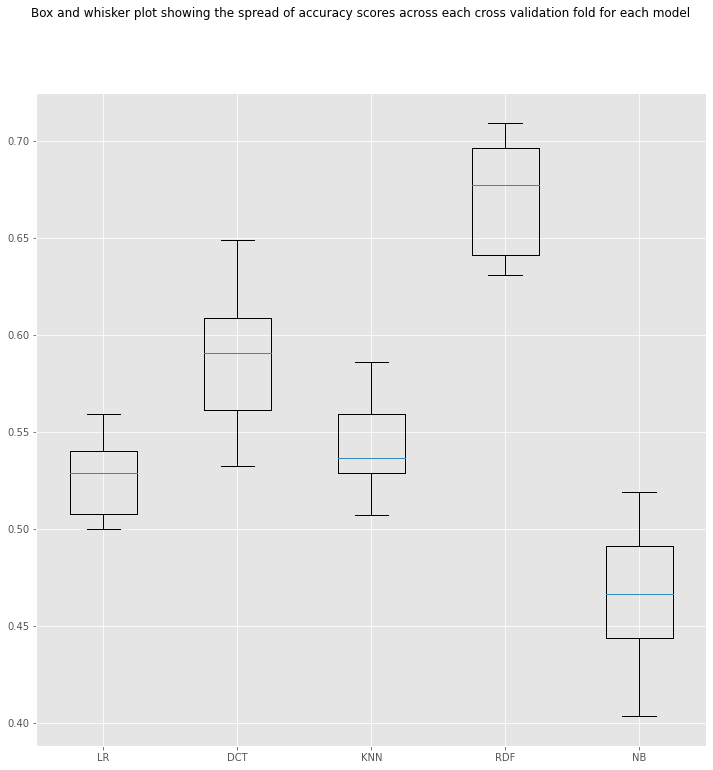

In [45]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('DCT', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RDF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
    
results = []
names = []
scoring = 'accuracy'

print('MEAN & STANDARD DEVIATION ACCURACY FOR EACH ALGORITHM')
for name, model in models:
	     kfold = model_selection.KFold(n_splits=10, random_state=seed)
	     cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	     results.append(cv_results)
	     names.append(name)
	     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	     print(msg)

fig = plt.figure(figsize=(12,12))
fig.suptitle('Box and whisker plot showing the spread of accuracy scores across each cross validation fold for each model')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

From the classification report obtained for the various models above, we oberseve that classes 8,4 and 8 of models 1,3 and 5 respectively were not taking into consideration during training, since the recall value for all is 0.  

The mean and standard deviation accuracies obtained for each of the algorithms above together with the box-whisker plot tells the story. It suggests that the best result is obtained with the Random Forest Classifier. However, it cannot be considered as an ideal model, reason being that according to the classification report of the Random Forest Classifier, its recall results are not representative enough for any of the classes, though there are some recall results even for the minority classes.

Take note of the following definitions:

**Precision** - for all instances classified positive, what percent was correct?

**Recall** - for all instances that were actually positive, what percent was classified correctly?

**f1score** -a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0


#**2. Application Review for AI Implementation**
Search by voice allows users to speak into a device rather than typing keywords into a search query to generate results. From the nine voice search statistics to close out 2019 which can be located here: https://searchengineland.com/nine-voice-search-stats-to-close-out-2019-326884, it is acknowledged that quite a reasonable percentage of searches on mobile devices are voice searches. Also, there has been a consistent increase in voice based searches, such that, it is estimated by 2022 voice-based shopping is expected to grow to $40 billion. Search by voice also improves the user experience

### **Problem Statement**
Taking into account the attention of potential clients that may prefer search by voice to typing (estimated to increase as the years go by) and to serve both the literate and illiterate, it becomes problematic given the presented application in *Question 2* does not support search by voice 

### **Methodology**
Search by voice basically implements the speech recognition technology to convert spoken utterances into text and then make querries with these texts.

The speech recognition packages in python that can be used are as follows:
*   apiai
*   assemblyai
*   Google-cloud-speech
*   SpeechRecognition
*   Pocketsphinx
*   Watson-developer-cloud
*   wit

Let's consider the SpeechRecognition library which provides support for several engines and APIs, online and offline. It is installed using the "*pip install SpeechRecognition*" command.
It has a Recogonizer class and this is where everything related to speech recognition is. The class has instances used to recognize speech and each instance has 7 methods to recognize speech from various audio sources, which are:
*   recognize_bing()
*   recognize_google()
*   recognize_google_cloud()
*   recognize_houndify()
*   recognize_ibm()
*   recognize_sphinx()
*   recognize_wit

To use the microphones, we install the PyAudio package in python using the *pip install pyaudio* command. In the microphone class we use the listen method to capture inputs from the microphone.

After successfully being able to capture audio from a client and convert it into text, we then use it querry the database of the given application to obtain the desired results.